In [42]:
from sklearn.datasets import  fetch_california_housing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [43]:
df_final_web_data_2 = pd.read_csv('/Users/Jaimecalderon/Desktop/IRONHACK/Proyectos/Proyecto 2/CSV/df_final_web_data_pt_2.txt')

In [44]:
#df_final_web_data_2['Date/Time']

In [45]:
df_final_web_data_2.rename(columns = {'client_id':'Client ID', 'visitor_id':'Visitor ID', 'visit_id':'Visit ID', 'process_step':'Process Step', 'date_time':'Date/Time'}, inplace=True)

In [46]:

# Asegúrate de que la columna está en formato datetime
df_final_web_data_2['Date/Time'] = pd.to_datetime(df_final_web_data_2['Date/Time'])

# Crear nuevas columnas para la fecha y la hora
df_final_web_data_2['Date'] = df_final_web_data_2['Date/Time'].dt.date
df_final_web_data_2['Time'] = df_final_web_data_2['Date/Time'].dt.time

# Ver el DataFrame resultante
df_final_web_data_2

,Client ID,Visitor ID,Visit ID,Process Step,Date/Time,Date,Time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00,2017-06-06,08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27,2017-06-01,11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48,2017-06-01,11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08,2017-06-01,11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58,2017-06-01,11:57:58
...,...,...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10,2017-05-24,18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29,2017-05-24,18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51,2017-05-24,18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34,2017-05-24,18:44:34


In [47]:
df_final_web_data_2['Process Step'].value_counts()

Process Step
start      135035
step_1      89761
step_2      71294
step_3      58614
confirm     57560
Name: count, dtype: int64

In [48]:
df_final_web_data_2.describe(include='object')

,Visitor ID,Visit ID,Process Step,Date,Time
count,412264,412264,412264,412264,412264
unique,71042,82841,5,51,72522
top,722943003_3441581446,875138661_34710212496_881092,start,2017-06-01,10:07:41
freq,104,104,135035,39140,36


In [49]:
df_final_web_data_2.describe(include='number')

,Client ID
count,4.122640e+05
mean,5.028227e+06
std,2.881828e+06
min,3.360000e+02
25%,2.533952e+06
50%,5.056314e+06
75%,7.516792e+06
max,9.999875e+06


In [50]:
df_final_web_data_2

,Client ID,Visitor ID,Visit ID,Process Step,Date/Time,Date,Time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00,2017-06-06,08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27,2017-06-01,11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48,2017-06-01,11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08,2017-06-01,11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58,2017-06-01,11:57:58
...,...,...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10,2017-05-24,18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29,2017-05-24,18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51,2017-05-24,18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34,2017-05-24,18:44:34


In [51]:
process_counts = df_final_web_data_2['Client ID'].value_counts().reset_index()
process_counts.columns = ['Process Step', 'Count']
process_counts

,Process Step,Count
0,5574879,104
1,2274658,90
2,5951379,80
3,1952790,80
4,3545814,72
...,...,...
67425,4220991,1
67426,7506474,1
67427,7414592,1
67428,1156842,1


/var/folders/zc/6rc7nzhj13scy5qssxw2pjlh0000gn/T/ipykernel_47702/1291251401.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unique_clients_per_step2, x='Process Step', y='Unique Client Count', palette="Set3")


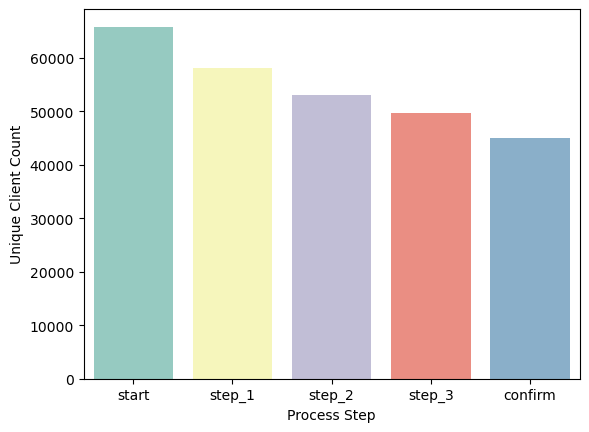

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar por 'Process Step' y contar los valores únicos de 'Client ID'
unique_clients_per_step = df_final_web_data_2.groupby('Process Step')['Client ID'].nunique()

# Convertir la serie a un DataFrame y restablecer el índice
unique_clients_per_step2 = unique_clients_per_step.reset_index()

# Renombrar las columnas para mayor claridad
unique_clients_per_step2.columns = ['Process Step', 'Unique Client Count']

# Ordenar el DataFrame para que 'start' esté al final
order = [ 'start', 'step_1', 'step_2', 'step_3', 'confirm']
unique_clients_per_step2['Process Step'] = pd.Categorical(unique_clients_per_step2['Process Step'], categories=order, ordered=True)
unique_clients_per_step2 = unique_clients_per_step2.sort_values('Process Step')

# Crear el gráfico de barras
sns.barplot(data=unique_clients_per_step2, x='Process Step', y='Unique Client Count', palette="Set3")

# Mostrar el gráfico
plt.show()

- Aqui podemos observar q los clientes abandonan la pagina o el proceso a medida q avanza, Calcular el drop rate. 

# DROP RATE

  Process Step  Unique Client Count  Drop Rate
1        start                65807   0.118604
2       step_1                58002   0.085307
3       step_2                53054   0.063973
4       step_3                49660   0.095570


/var/folders/zc/6rc7nzhj13scy5qssxw2pjlh0000gn/T/ipykernel_47702/2943562265.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unique_clients_per_step2, x='Process Step', y='Drop Rate', palette="Set3")


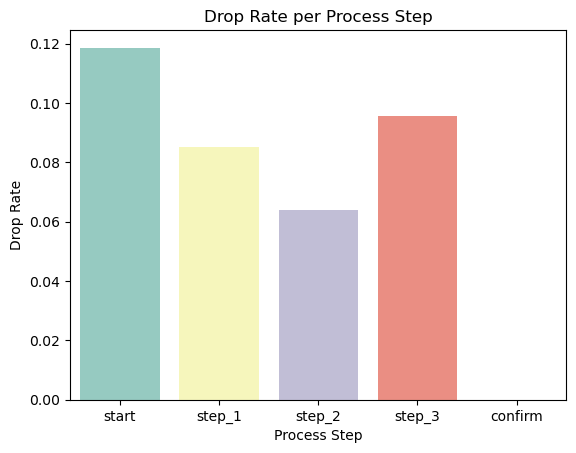

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar por 'Process Step' y contar los valores únicos de 'Client ID'
unique_clients_per_step = df_final_web_data_2.groupby('Process Step')['Client ID'].nunique()

# Convertir la serie a un DataFrame y restablecer el índice
unique_clients_per_step2 = unique_clients_per_step.reset_index()

# Renombrar las columnas para mayor claridad
unique_clients_per_step2.columns = ['Process Step', 'Unique Client Count']

# Ordenar el DataFrame para que 'start' esté al final
order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
unique_clients_per_step2['Process Step'] = pd.Categorical(unique_clients_per_step2['Process Step'], categories=order, ordered=True)
unique_clients_per_step2 = unique_clients_per_step2.sort_values('Process Step')

# Calcular el drop rate
unique_clients_per_step2['Drop Rate'] = unique_clients_per_step2['Unique Client Count'].diff(-1) / unique_clients_per_step2['Unique Client Count']

# Eliminar la última fila porque no tiene un paso siguiente para calcular el drop rate
unique_clients_per_step2 = unique_clients_per_step2[:-1]

# Imprimir los valores intermedios
print(unique_clients_per_step2)

# Crear el gráfico de barras para el drop rate
sns.barplot(data=unique_clients_per_step2, x='Process Step', y='Drop Rate', palette="Set3")

# Mostrar el gráfico
plt.title('Drop Rate per Process Step')
plt.ylabel('Drop Rate')
plt.xlabel('Process Step')
plt.show()


- Podemos observar q hay un mayor numero de clientes unicos en la segunda pag web. 

- A parte de eso, podemos observar q hay un menor porcentaje de abandono en todos los pasos del proceso excepto en el paso 2 donde hay mas abandonos q en la primera pag web. 

### CONVERSION RATE

In [54]:
# Agrupar los datos por 'Process Step' y contar clientes únicos
unique_clients_per_step1 = df_final_web_data_2.groupby('Process Step')['Client ID'].nunique().reset_index()
unique_clients_per_step1.rename(columns={'Client ID': 'Unique Client Count'}, inplace=True)

# Extraer los conteos para 'start' y 'confirm'
start_count = unique_clients_per_step1[unique_clients_per_step1['Process Step'] == 'start']['Unique Client Count']
confirm_count = unique_clients_per_step1[unique_clients_per_step1['Process Step'] == 'confirm']['Unique Client Count']

# Verificar que ambos conteos existan y no sean cero
if not start_count.empty and not confirm_count.empty and start_count.values[0] > 0:
    conversion_rate = confirm_count.values[0] / start_count.values[0]
    print(f"Conversion Rate: {conversion_rate:.2%}")
else:
    print("No data available for one or both process steps or start count is zero.")

Conversion Rate: 68.25%


- Podemos observar que hay un mayor conversion rate en la 2ª. 

In [55]:
df_final_web_data_2

,Client ID,Visitor ID,Visit ID,Process Step,Date/Time,Date,Time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00,2017-06-06,08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27,2017-06-01,11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48,2017-06-01,11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08,2017-06-01,11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58,2017-06-01,11:57:58
...,...,...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10,2017-05-24,18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29,2017-05-24,18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51,2017-05-24,18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34,2017-05-24,18:44:34


In [56]:
df = df_final_web_data_2

# Convertir 'Date/Time' a tipo datetime
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Ordenar por 'Client ID', 'Visitor ID', 'Visit ID' y 'Date/Time'
df.sort_values(by=['Client ID', 'Visitor ID', 'Visit ID', 'Date/Time'], inplace=True)

# Calcular la diferencia de tiempo entre pasos consecutivos
df['Time Diff'] = df.groupby(['Client ID', 'Visitor ID', 'Visit ID'])['Date/Time'].diff()

# Filtrar las diferencias de tiempo entre pasos del proceso
# En este caso, necesitamos las diferencias entre 'step_1', 'step_2', 'step_3', etc.
df_steps = df

# Mostrar resultados
df_steps[['Client ID', 'Visitor ID', 'Visit ID', 'Process Step', 'Date', 'Time', 'Time Diff']]

,Client ID,Visitor ID,Visit ID,Process Step,Date,Time,Time Diff
285315,336,64757908_3400128256,649044751_80905125055_554468,start,2017-06-01,07:26:55,NaT
285190,336,64757908_3400128256,649044751_80905125055_554468,start,2017-06-01,07:42:43,0 days 00:15:48
99716,546,475037402_89828530214,731811517_9330176838_94847,start,2017-06-17,10:03:29,NaT
99715,546,475037402_89828530214,731811517_9330176838_94847,step_1,2017-06-17,10:03:39,0 days 00:00:10
99714,546,475037402_89828530214,731811517_9330176838_94847,step_2,2017-06-17,10:03:52,0 days 00:00:13
...,...,...,...,...,...,...,...
305392,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01,22:40:08,0 days 00:00:07
305391,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01,22:41:28,0 days 00:01:20
305390,9999875,738878760_1556639849,931268933_219402947_599432,step_2,2017-06-01,22:41:47,0 days 00:00:19
305389,9999875,738878760_1556639849,931268933_219402947_599432,step_3,2017-06-01,22:44:58,0 days 00:03:11


# Average time per step

In [57]:
average_time_per_step = df_final_web_data_2.groupby('Process Step')['Time Diff'].mean()
average_time_per_step

Process Step
confirm   0 days 00:02:08.553485886
start     0 days 00:02:11.062229490
step_1    0 days 00:00:37.691107486
step_2    0 days 00:00:46.982771746
step_3    0 days 00:01:44.956352837
Name: Time Diff, dtype: timedelta64[ns]

- Comparando los average time de cada pag web podemos observar que el step_2 es el unico q sube el tiempo, indicando q los usurios estan mas tiempo en ese paso del proceso. En el resto de pasos el tiempo disminuye.  

In [58]:
average_time_per_step = df_final_web_data_2.groupby('Process Step')['Time Diff'].mean()
print(average_time_per_step)

Process Step
confirm   0 days 00:02:08.553485886
start     0 days 00:02:11.062229490
step_1    0 days 00:00:37.691107486
step_2    0 days 00:00:46.982771746
step_3    0 days 00:01:44.956352837
Name: Time Diff, dtype: timedelta64[ns]


# Funnel

In [59]:
funnel = unique_clients_per_step1.set_index('Process Step').reindex(order)['Unique Client Count']
funnel

Process Step
start      65807
step_1     58002
step_2     53054
step_3     49660
confirm    44914
Name: Unique Client Count, dtype: int64

- Number of clients in each step. 

# Bounce Rate

In [60]:
bounce_rate = (unique_clients_per_step1[unique_clients_per_step1['Process Step'] == 'start']['Unique Client Count'].values[0] - 
               unique_clients_per_step1[unique_clients_per_step1['Process Step'] == 'step_1']['Unique Client Count'].values[0])/unique_clients_per_step1[unique_clients_per_step1['Process Step'] == 'start']['Unique Client Count'].values[0]
print(f"Bounce Rate: {bounce_rate:.2%}")

Bounce Rate: 11.86%


- Porcentaje de personas q abandonan el proceso en el primer paso.

- Podemos observar q hay un mayor porcentaje de abandono en la primera pag web. 